**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 2: Machine Learning*

# Identification

Name: Joe Zhang <br/> 
Student Number: 300245795

Name: Christian Paravalos<br/> 
Student Number: 300231900

# 1. Exploratory Analysis

## Data Exploration

In this assignment, we will utilize the Diabetes Prediction Dataset, accessible via [Diabetes Prediction Dataset](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data). To mitigate the complexity associated with Kaggle's login requirement, the dataset has been made available on a public GitHub repository:

- [github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2](https://github.com/turcotte/csi4106-f24/tree/main/assignments-data/a2)

You can access and read the dataset directly from this GitHub repository in your Jupyter notebook.

In [10]:
# We first load necessary packages
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

1. **Load the dataset and provide a summary of its structure**:

    - Describe the features (columns), their data types, and the target variable.

In [2]:
# We first load the dataset
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a2/diabetes_prediction_dataset.csv"
df = pd.read_csv(url)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
# Show data types
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

The dataset's features include the gender and age of individuals, whether the individual has hypertension, whether the individual has heart disease, their smoking history, BMI, HbA1c level, and blood glucose level. The target variable is whether they have diabetes. We have the gender is either male or female, age is numeric, hypertension and heart disease are binary variables, 0 for no and 1 for yes. Smoking history is either never, ever, current, not current, former or no info, which means that it's either they never smoke, they used to smoke, they smoke right now, or they don't have info on smoking. BMI, HbA1c level, and blood glucose level are all numeric. The target variable diabetes is a binary variable, with 0 for no and 1 for yes. 

2. **Feature Distribution Analysis**:

    - Examine the distribution of each feature using appropriate visualizations such as histograms and boxplots. Discuss insights gained, including the presence of outliers.

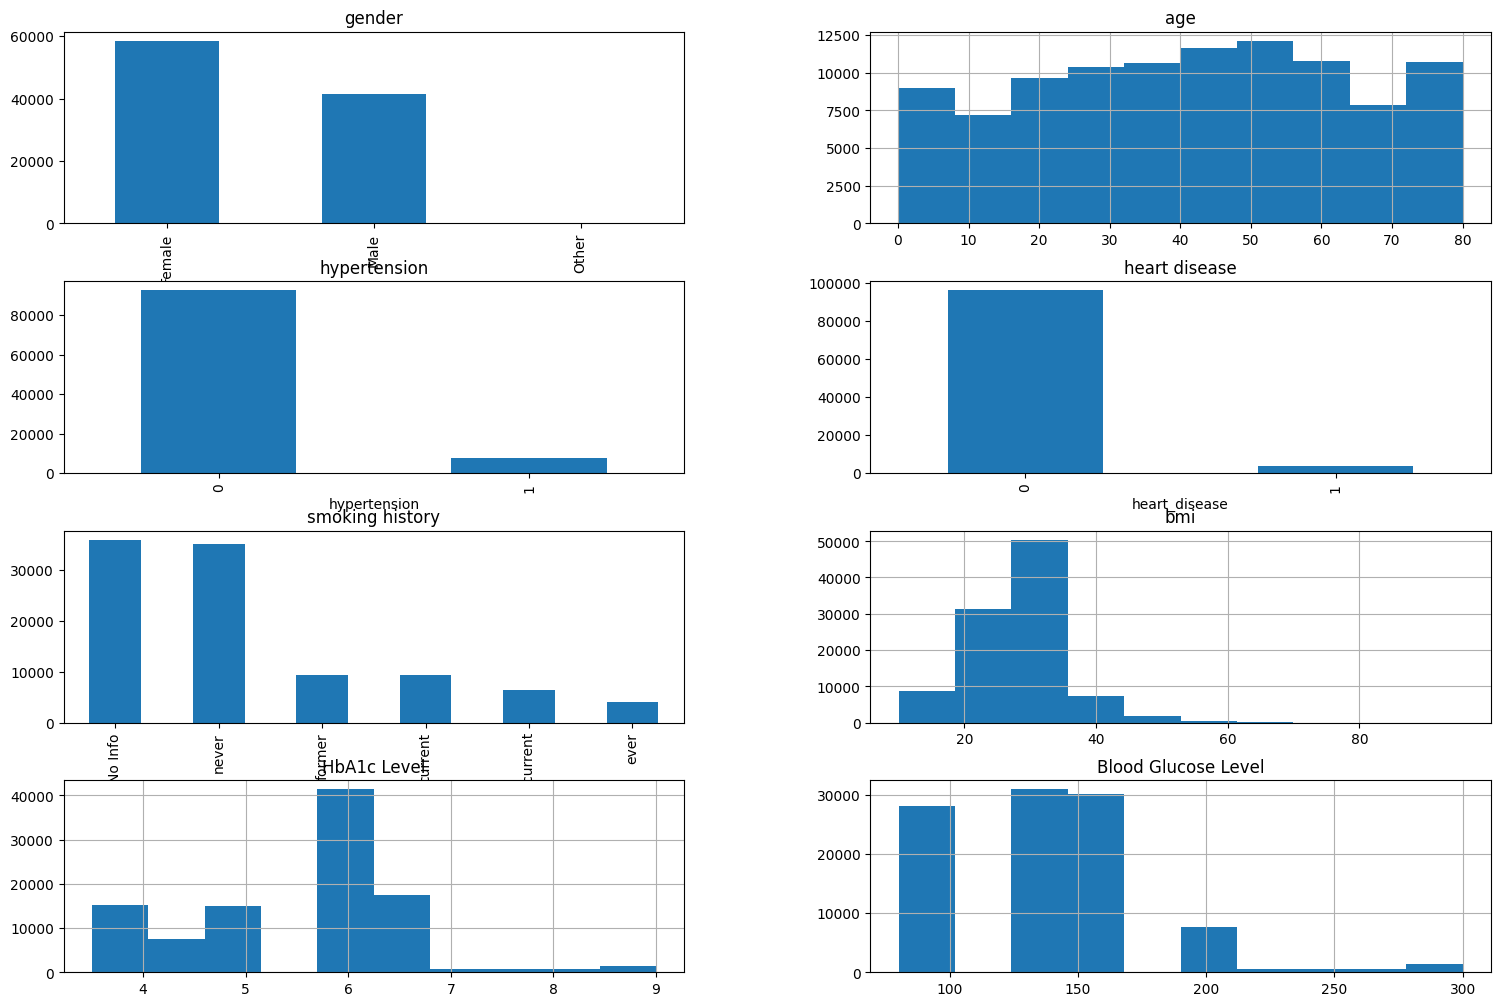

In [8]:
# We use matplotlib to draw charts
# We draw histograms for numerical variables and bar charts for categorical variables

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 10))
fig.tight_layout(h_pad=2)

df['gender'].value_counts().plot(ax = axes[0, 0], kind = "bar")
axes[0, 0].set_title("gender")

df.hist(column = "age", ax = axes[0,1])
axes[0, 1].set_title("age")

df['hypertension'].value_counts().plot(ax = axes[1, 0], kind = "bar")
axes[1, 0].set_title("hypertension")

df['heart_disease'].value_counts().plot(ax = axes[1,1], kind = "bar")
axes[1, 1].set_title("heart disease")

df['smoking_history'].value_counts().plot(ax = axes[2, 0], kind = "bar")
axes[2, 0].set_title("smoking history")

df.hist(column = "bmi", ax = axes[2, 1])
axes[2, 1].set_title("bmi")

df.hist(column = "HbA1c_level", ax = axes[3, 0])
axes[3, 0].set_title("HbA1c Level")

df.hist(column = "blood_glucose_level", ax = axes[3, 1])
axes[3, 1].set_title("Blood Glucose Level")

plt.show()

Above are the charts for all the features. In this dataset, we have 4 numerical features and 4 categorical features. 

For the numerical features, we have age, BMI, HbA1c level, and blood glucose level. We use histograms to visualize their distributions. 

For the feature age, we have that the distribution is quite uniform from 0 to 80. There are no people with age greater than 80 in the sample. There do not seem to be any outliers as the distribution looks uniform over all age groups. 

For the feature BMI, we see that most of the values are centered between 20 and 40 and is skewed to the right. There seem to be outliers with values greater than 60. This shows that most people have normal weight or are overweight, but there are a few that are obese.

For the feature HbA1c level, we see that most values are centered around 6. There are also some that are between 1 and 5 and very few that are greater than 7. The normal level is below 5.7. Therefore, we have some people that have normal HbA1c level, some that are a little above normal, and very few that have very high levels. There seem to be outliers with values between 8 and 9.

For the feature blood glucose level, we have that most of hte values are below 200. There are some that are less than 100 and some that are between 125 and 175. This shows that most people have normal or slighly above normal blood glucose level. There are some that are above 200, which shows that there are very few people that have very high levels of blood glucose. There seem to be outliers between 250 and 300.

For the categorical features, we have gender, hypertension, heart disease, and smoking history. We use bar charts to visualize their distributions.

For the feature gender, we see that there are slightly more females than males in the sample. There's very few people that have other genders.

For the feature hyptertension, we see that most people have the value 0, while very few have the value 1. This shows that most people in the data don't have hypertension, while there are very few that do.

For the feature heart disease, we see that most people have the value 0, while very few have the value 1. This shows that most people in the data don't have heart disease, while there are very few that do.

For the feature smoking history, we see that most people either never smoke or they have no info on their smoking history. There's a few people that are current, not current, former, or ever. This shows that most people are non-smokers, with a few that either used to smoke or still smoke now.

3. **Target Variable Distribution**:

    - Analyze the distribution of the target variable to identify class imbalances. Use bar plots to visualize the class frequencies.

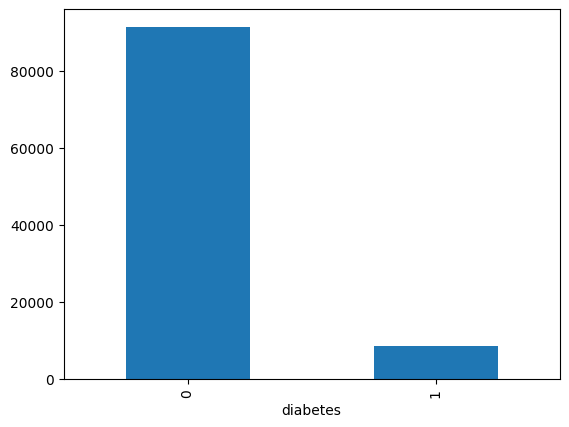

In [9]:
# We construct a bar chart that shows the distribution of the target variable
df['diabetes'].value_counts().plot(kind = "bar")
plt.show()

We see that for the target variable, or diabetes, we have that most people have the value 0, while some have the value 1. This shows that most people in the sample are not diabetic, while a few are diabetic. This shows that the classes are not balanced and accuracy is not a good measure to evaluate models.

4. **Data Splitting**:

    - Split the dataset into training (80%) and test (20%) sets using the holdout method.

    - Ensure that this split occurs before any preprocessing to avoid data leakage.

In [19]:
# Code cell
X = df.drop(columns = ['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Data Pre-Processing

5. **Categorical Variable Encoding**:

    - Encode any categorical variables. Justify the chosen method.

For the categorical variables gender and smoking history, we decided to use one-hot encoding because they both have more than 2 categories. It's better to use one-hot encoding because it increases dimensionality and decreases bias. 

For the categorical variables hypertension and heart disease, since they're binary and numerical (they take values 0 or 1), we don't think encoding them will be necessary.

(Note for Christian: This is just my opinion. If you think any of this needs to be changed, feel free to make changes)

In [39]:
# We do one-hot encoding on the categorical features

# For feature gender
# We first encode the training set
df['gender'].unique()
work = X_train[['gender']]
enc = preprocessing.OneHotEncoder()
enc.fit(work)
values_encoded = enc.transform(work).toarray()
X_train['female_gender'] = values_encoded[:, 0]
X_train['male_gender'] = values_encoded[:, 1]
X_train['other_gender'] = values_encoded[:, 2]

# Now we encode the test set
work2 = X_test[['gender']]
values_encoded = enc.transform(work2).toarray()
X_test['female_gender'] = values_encoded[:, 0]
X_test['male_gender'] = values_encoded[:, 1]
X_test['other_gender'] = values_encoded[:, 2]


# For feature smoking history
# We first encode the training set
df['smoking_history'].unique()
work = X_train[['smoking_history']]
enc2 = preprocessing.OneHotEncoder(categories = [['never', 'No Info', 'current', 'former', 'ever', 'not current']])
enc2.fit(work)
values_encoded = enc2.transform(work).toarray()
X_train['never_smoke'] = values_encoded[:, 0]
X_train['no_info_smoke'] = values_encoded[:, 1]
X_train['current_smoke'] = values_encoded[:, 2]
X_train['former_smoke'] = values_encoded[:, 3]
X_train['ever_smoke'] = values_encoded[:, 4]
X_train['not_current_smoke'] = values_encoded[:, 5]

# Now we encode the test set
work2 = X_test[['smoking_history']]
values_encoded = enc2.transform(work2).toarray()
X_test['never_smoke'] = values_encoded[:, 0]
X_test['no_info_smoke'] = values_encoded[:, 1]
X_test['current_smoke'] = values_encoded[:, 2]
X_test['former_smoke'] = values_encoded[:, 3]
X_test['ever_smoke'] = values_encoded[:, 4]
X_test['not_current_smoke'] = values_encoded[:, 5]


6. **Normalization/Standardization of Numerical Features**:

    - Normalize or standardize numerical features if necessary. Describe the technique used (e.g., Min-Max scaling, StandardScaler) and explain why it is suitable for this dataset.

    - Ensure that this technique is applied only to the training data, with the same transformation subsequently applied to the test data without fitting on it.

For the feature age, we see from the histogram that it's approximately uniformly distributed and there doesn't seem to be any outliers. Therefore, I think normalization with min-max scaling is appropriate. Normalization can also ensure that the values for age are between 0 and 1 and I think it's appropriate since age should be bounded.

For the feature BMI, we think that standardization is appropriate because it takes a large range of values and there seems to be outliers. Standardization is robust to outliers so we think it's more suitable for this feature. BMI also shouldn't be bounded.

For the feature HbA1c level, we think that standardization is appropriate because there do seem to be outliers and standardization is more robust to outliers. We also don't think this feature should be bounded.

For the feature blood glucose level, we think that standardization is appropriate because there do seem to be outliers and the values are all quite large. We also don't think the values shouldn't be bounded between 0 and 1.

In [57]:
# We now apply normalization for the feature age
work = X_train[['age']]
scaler1 = preprocessing.MinMaxScaler()
scaler1 = scaler1.fit(work)
scaled_data = scaler1.transform(work)
X_train['age_normalized'] = scaled_data

work2 = X_test[['age']]
scaled_data = scaler1.transform(work2)
X_test['age_normalized'] = scaled_data

# We now apply standardization for the features bmi, HbA1c level, and blood glucose level
work = X_train[['bmi', 'HbA1c_level', 'blood_glucose_level']]
scaler2 = preprocessing.StandardScaler()
scaler2 = scaler2.fit(work)
scaled_data = scaler2.transform(work)
X_train['bmi_standardized'] = scaled_data[:, 0]
X_train['HbA1c_level_standardized'] = scaled_data[:, 1]
X_train['blood_glucose_level_standardized'] = scaled_data[:, 2]

work2 = X_test[['bmi', 'HbA1c_level', 'blood_glucose_level']]
scaled_data = scaler2.transform(work2)
X_test['bmi_standardized'] = scaled_data[:, 0]
X_test['HbA1c_level_standardized'] = scaled_data[:, 1]
X_test['blood_glucose_level_standardized'] = scaled_data[:, 2]


## Model Development & Evaluation

7. **Model Development**:

    - Implement the machine learning models covered in class: Decision Trees, K-Nearest Neighbors (KNN), and Logistic Regression. Use the default parameters of scikit-learn as a baseline for training each model.

In [ ]:
# Code cell

8. **Model Evaluation**:

    - Use cross-validation to evaluate each model, justifying your choice of the number of folds.

    - Assess the models using metrics such as precision, recall, and F1-score.

In [ ]:
# Code cell

## Hyperparameter Optimization

9. **Exploration and Performance Evaluation:**

    - Investigate the impact of varying hyperparameter values on the performance of each model.

    - Focus on the following relevant hyperparameters for each model:

        - [DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html): `criterion` and `max_depth`.
  
        - [LogisticRegression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html): `penalty`, `max_iter`, and `tol`.
  
        - [KNeighborsClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KNeighborsClassifier.html): `n_neighbors` and `weights`.

    - Employ a grid search strategy or utilize scikit-learn's built-in methods to thoroughly evaluate all combinations of hyperparameter values. Cross-validation should be used to assess each combination.

    - Quantify the performance of each hyperparameter configuration using precision, recall, and F1-score as metrics.

    - Display the results in a tabular or graphical format (e.g., line charts, bar charts) to effectively demonstrate the influence of hyperparameter variations on model performance.

    - Specify the default values for each hyperparameter tested.

    - Analyze the findings and offer insights into which hyperparameter configurations achieved optimal performance for each model.

In [ ]:
# Code cell

## Analysis of Results

10. **Model Comparison**:

    - Compare the results obtained from each model.

    - Discuss observed differences in model performance, providing potential explanations. Consider aspects such as model complexity, data imbalance, overfitting, and the impact of parameter tuning on overall results.

    - Provide recommendations on which model(s) to choose for this task and justify your choices based on the analysis results.

    - Train the recommended model(s) using the optimal parameter values identified from the parameter optimization step. Subsequently, apply the trained model to the test data. Document your observations comprehensively. Specifically, evaluate whether the results derived from cross-validation are consistent with those obtained from the test set.

In [ ]:
# Code cell

## 2. Documentation of Exploratory Analysis

The report should comprehensively document the entire process followed during this assignment. The Jupyter Notebook must include the following:

- Your name(s), student number(s), and a report title.
- Explain how the tasks have been split between the members. How did you make sure that both students achieve the learning outcomes? 
- A section for each step of the exploratory analysis, containing the relevant Python code and explanations or results.
  - For sections requiring Python code, include the code in a cell.
  - For sections requiring explanations or results, include these in a separate cell or in combination with code cells.
- Ensure logical separation of code into different cells. For example, the definition of a function should be in one cell and its execution in another. Avoid placing too much code in a single cell to maintain clarity and readability.
- The notebook you submit must include the results of the execution, complete with graphics, ensuring that the teaching assistant can grade the notebook without needing to execute the code.

# Resources